In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

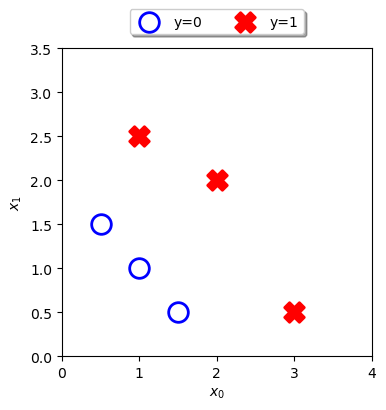

In [3]:
x1, x2 = x[:,0], x[:,1]
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(x1[y.ravel() == 0], x2[y.ravel() == 0],color='white', edgecolors='blue', s=200, linewidth=2, marker='o', label='y=0')
ax.scatter(x1[y.ravel() == 1], x2[y.ravel() == 1],  color='red', s=200, linewidth=2, marker='X', label='y=1')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True, ncol=2)
ax.axis([0,4,0,3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

In [ ]:
def sigmoid(z):
    f = 1/(1+np.exp(-z))
    return f


In [7]:
def compute_gradient_logistic(x,y,w,b):
    m = x.shape[0]
    n = x.shape[1]
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb = sigmoid(np.dot(w,x[i])+b)
        err = f_wb - y[i]
        for j in range(n):
            dj_dw[j] += err*x[i,j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw,dj_db

In [8]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [10]:
def compute_gradient_descent(x,y,w_in,b_in,alpha,num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(x,y,w,b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(compute_gradient_logistic(x, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w,b,J_history

In [11]:
w_tmp  = np.zeros_like(x[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = compute_gradient_descent(x, y, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost (array([-0.22449108, -0.14601523]), 0.014924742767851254)   
Iteration 1000: Cost (array([-0.01154724, -0.01179442]), 0.03292263785587346)   
Iteration 2000: Cost (array([-0.00639134, -0.0064637 ]), 0.017933890941894477)   
Iteration 3000: Cost (array([-0.00437133, -0.00440444]), 0.01219290340280725)   
Iteration 4000: Cost (array([-0.00331049, -0.00332914]), 0.009205288270528337)   
Iteration 5000: Cost (array([-0.00266019, -0.00267204]), 0.007382936755160792)   
Iteration 6000: Cost (array([-0.00222181, -0.00222997]), 0.006158304660621156)   
Iteration 7000: Cost (array([-0.00190669, -0.00191261]), 0.005279886586599484)   
Iteration 8000: Cost (array([-0.00166943, -0.00167391]), 0.004619558128642703)   
Iteration 9000: Cost (array([-0.00148444, -0.00148794]), 0.0041053232770014575)   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837
